In [1]:
import warnings                                     # 경고 메시지를 출력하지 않게 하기 위해 import 한다.
warnings.filterwarnings(action='ignore')            # 경고 메시지를 출력하지 않게 한다.
%config Completer.use_jedi = False                  # 자동 완성 기능이 실행 안될 경우 실행 가능하게 한다.
import numpy as np                                  # 수치 계산, 배열 처리를 하기 위해 import 한다.
import pandas as pd                                 # 데이터 분석을 위한 전처리를 하기 위해 import 한다.
import matplotlib.pyplot as plt                     # 시각화를 하기 위해 import 한다.
import matplotlib as mpl                            # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 현상을 방지하기 위해 import 한다.
mpl.rcParams['axes.unicode_minus'] = False          # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 현상을 방지한다.
plt.rcParams['font.family'] = 'NanumGothicCoding'   # matplotlib에서 사용할 한글 글꼴을 지정한다.
plt.rcParams['font.size'] = 12                      # matplotlib에서 사용할 글꼴의 크기를 지정한다.
import seaborn as sns                               # matplotlib을 기반으로 만든 시각화 도구를 import 한다.
import missingno as msno                            # 누락값의 분포를 그래프 형태로 시각화 하기 위해 import 한다.
from plotnine import *                              # R의 ggplot2 패키지를 사용하는 것 처럼 사용하는 시각화 도구를 import 한다.
import folium                                       # 지도 시각화를 하기 위해 import 한다.
# 쥬피터 노트북에서 그래프를 표시되게 한다. => 지금은 사용하지 않아도 표시된다.
# %matplotlib inline
# 쥬피터 노트북에 출력된 그래프를 변형할 수 있게 한다.
# %matplotlib notebook

서울시는 4급 부서장 이상의 간부직 공무원의 업무 추진비 집행 내역을 활용하여 업무 추진비 사용 목적과 업무 추진비를 사용한 장소를 분석한다.

http://opengov.seoul.go.kr/expense/list

In [2]:
df = pd.read_csv('./data/raw.csv')
df

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


In [3]:
# 데이터프레임의 컬럼에 이름을 지정한다. => 인덱스 열에 이름을 지정한 것 처럼 보인다.
df.columns.name = '연번'
# 데이터프레임의 인덱스에 이름을 지정한다.
df.index.name = '일련번호'
df.head()

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,,
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [4]:
# 1소속부서 열의 이름을 소속부서로 변경한다.
# df.columns = ['소속부서', '결제방법', '구분', '대상인원', '부서명', '일련번호', '집행금액', '집행목적', '집행일시', '집행장소']
df.rename(columns={'1소속부서': '소속부서'}, inplace=True)

In [5]:
df.columns

Index(['소속부서', '결제방법', '구분', '대상인원', '부서명', '일련번호', '집행금액', '집행목적', '집행일시',
       '집행장소'],
      dtype='object', name='연번')

In [6]:
# read_csv() 메소드로 파일을 읽어들일 때 index_col 속성을 지정하면 index_col 속성으로 지정한 열을 인덱스로
# 끌어와서 데이터프레임을 만들어 리턴한다.
df = pd.read_csv('./data/raw.csv', index_col='일련번호')
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)


In [7]:
# dtypes 속성이나 info() 메소드를 이용해서 각 열의 정보를 확인한다.
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51456 entries, 1 to 43
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   집행금액    51455 non-null  float64
 6   집행목적    51440 non-null  object 
 7   집행일시    51455 non-null  object 
 8   집행장소    51421 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


In [8]:
# 누락값의 개수를 확인한다.
# df.isnull().sum()
df.isna().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

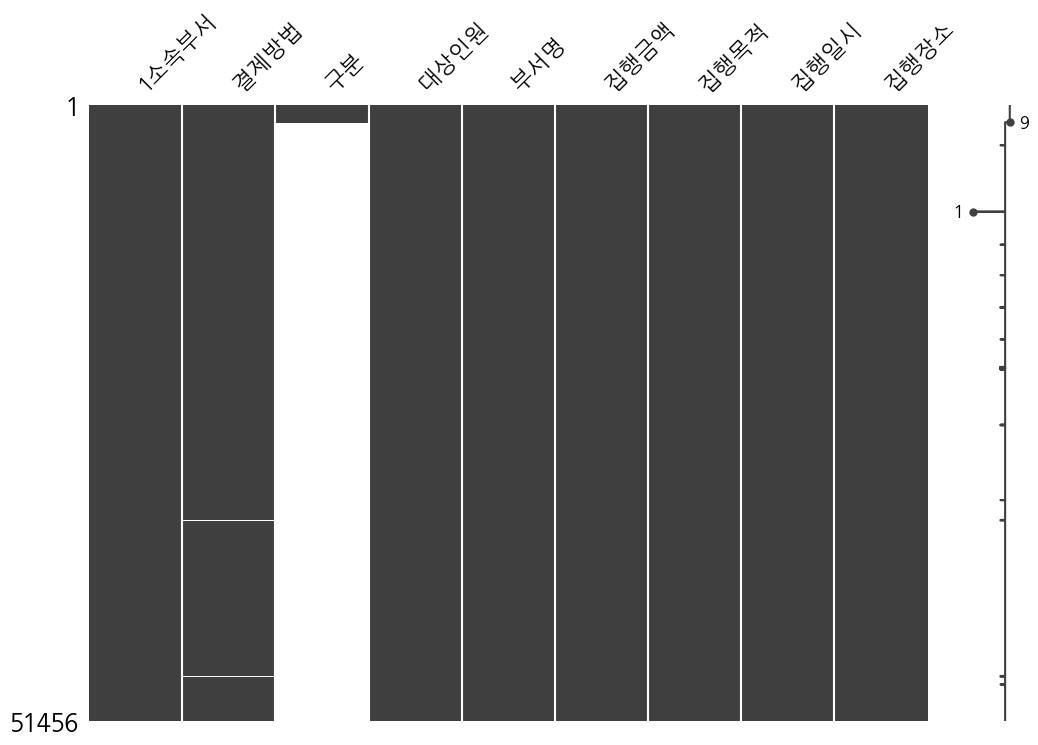

In [9]:
# missingno 패키지로 누락값을 시각화해 본다.
msno.matrix(df, figsize=(12, 8))
plt.show()

In [10]:
# 집행일시에 누락값이 있으므로 해당 데이터를 확인해본다.
df[df.집행일시.isnull()] # df[df.집행일시.isna()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# df[df.집행일시.isnull()].loc['해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.']
# df[df.집행일시.isnull()].iloc[0]
# df[df.집행일시.isnull()].iloc[0].name
df[df.집행일시.isnull()].index[0]

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [12]:
# 집행일시가 누락값인 데이터를 제거한다.
print(df.shape)
df.drop(df[df.집행일시.isnull()].index[0], inplace=True)
print(df.shape)

(51456, 9)
(51455, 9)


집행일시 열의 데이터 타입을 datetime으로 변경한다.

In [13]:
df['집행일시'] = pd.to_datetime(df.집행일시)
df.dtypes

1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
dtype: object

집행일시 열을 이용해서 '연', '월', '일', '연월', '시', '분', '요일' 파생 변수를 만든다.

In [14]:
print('2018-01-19 20:41'.split(' '))
print('2018-01-19 20:41'.split(' ')[0].split('-'))
print('2018-01-19 20:41'.split(' ')[1].split(':'))

['2018-01-19', '20:41']
['2018', '01', '19']
['20', '41']


In [15]:
from datetime import datetime as dt

In [16]:
now = dt.now()
print(now)
print(now.year)
print(now.month)
print(now.day)
print(now.hour)
print(now.minute)
print(now.second)
print(now.microsecond)
print(now.weekday()) # 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)

2024-05-08 17:49:14.010380
2024
5
8
17
49
14
10380
2


In [17]:
# print(type(df.집행일시)) # <class 'pandas.core.series.Series'>
# 데이터 타입이 datetime인 시리즈에 날짜 시간 속성을 적용하려면 dt를 붙여주면 된다.
# print(type(df.집행일시.dt)) # <class 'pandas.core.indexes.accessors.DatetimeProperties'>
# dt를 붙여주면 year, month, day, hour, minute, second, dayofweek와 같은 속성을 사용할 수 있다.
# dt를 붙여준 시리즈에 대한 작업이 완료되면 다시 시리즈로 돌아간다.
# print(type(df.집행일시.dt.year)) # <class 'pandas.core.series.Series'>
# print(df.집행일시.dt.year)
# 위와 같이 실행하면 dtype이 int64(8바이트 정수)로 지정되므로 메모리를 절약하려면 astype() 메소드로
# 크기를 줄여준다.
print(df.집행일시.dt.year.astype(int)) # astype(np.int32)

일련번호
1     2018
2     2018
3     2018
4     2018
5     2018
      ... 
39    2016
40    2016
41    2016
42    2016
43    2016
Name: 집행일시, Length: 51455, dtype: int32


In [18]:
df['연'] = df.집행일시.dt.year.astype(int)
df['월'] = df.집행일시.dt.month.astype(int)
df['연월'] = df.연.astype(str) + '-' + df.월.astype(str)
df['일'] = df.집행일시.dt.day.astype(int)
df['시'] = df.집행일시.dt.hour.astype(int)
df['분'] = df.집행일시.dt.minute.astype(int)
# df['요일'] = df.집행일시.dt.weekday.astype(int)
df['요일'] = df.집행일시.dt.dayofweek.astype(int)
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
일련번호,,,,,,,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,2018-1,19,20,41,4
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,2018-1,23,19,6,1
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,2018-1,29,20,13,0
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,9,4
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길),2016,12,2016-12,29,13,23,3
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82),2016,12,2016-12,29,21,19,3
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84),2016,12,2016-12,30,13,4,4


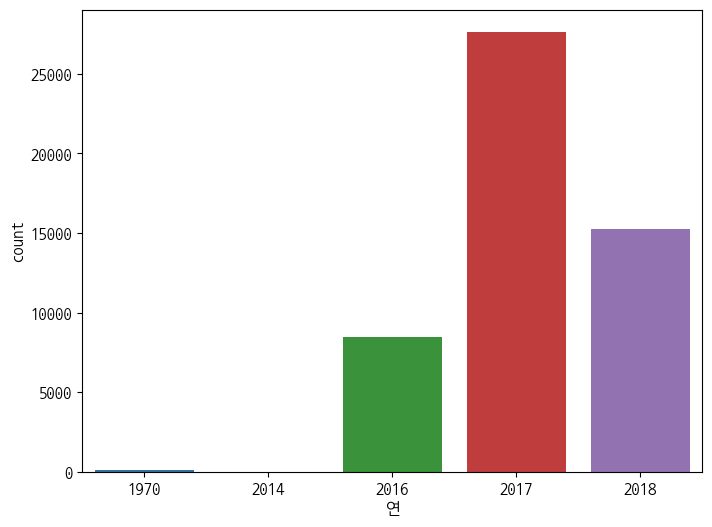

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='연')
plt.show()

In [24]:
df[df.연 == 1970]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
일련번호,,,,,,,,,,,,,,,,
31,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1970-1,1,9,0,3
46,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1970-1,1,9,0,3
27,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1970-1,1,9,0,3
37,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1970-1,1,9,0,3
38,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1970-1,1,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3


In [26]:
df[df.연 == 2014]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
일련번호,,,,,,,,,,,,,,,,
26,비상기획관,카드,NaN,"민방위담당관, 주ㅇㅇ주무관등 16명",민방위담당관,64000.0,제407차 민방위의 날 전국 지진대피훈련 관련 간담회,2014-04-23 10:41:00,서울시청구내식당(중구 세종대로),2014,4,2014-4,23,10,41,2


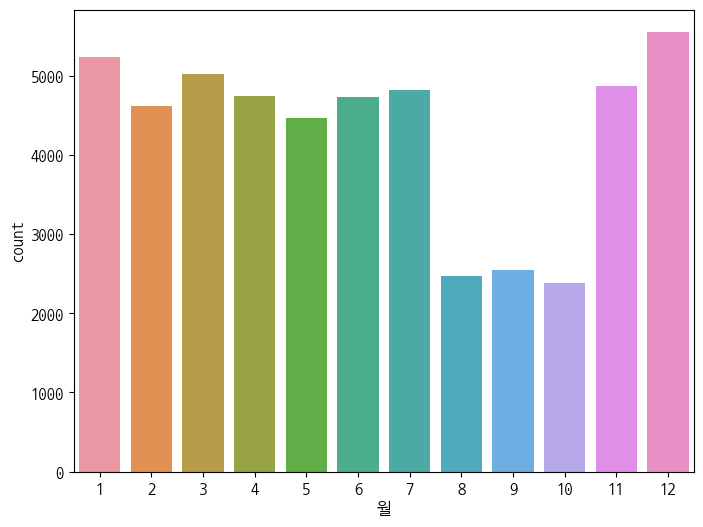

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='월')
plt.show()

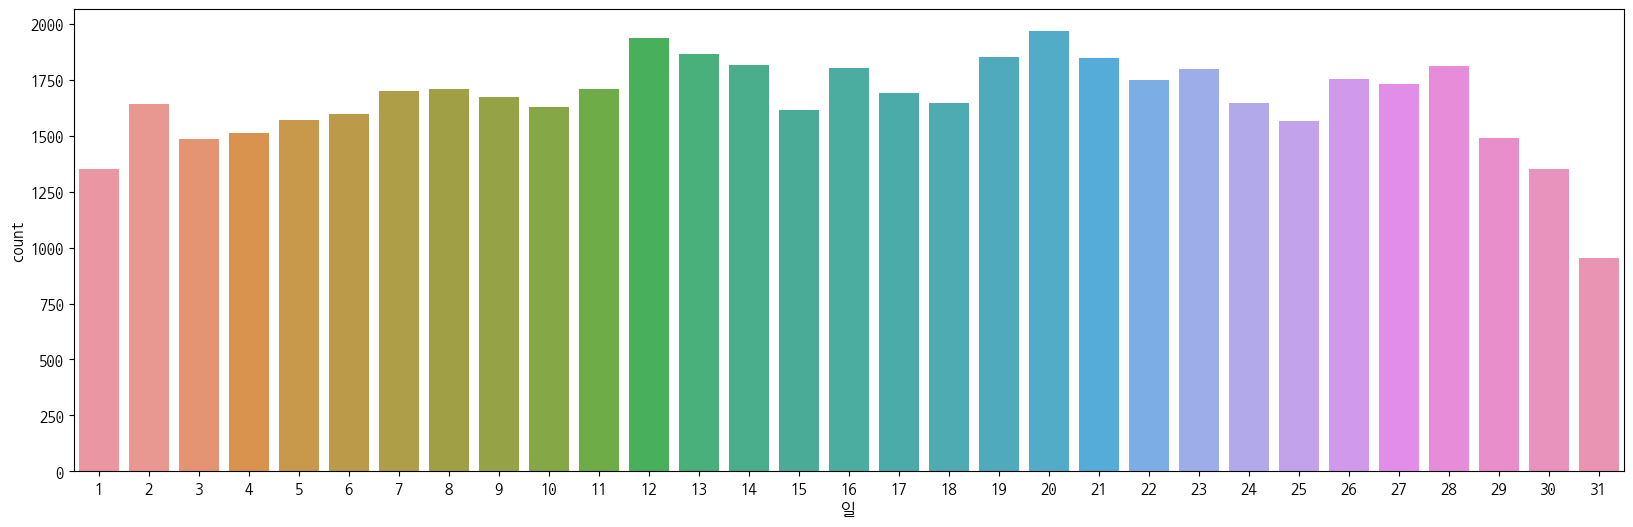

In [30]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='일')
plt.show()

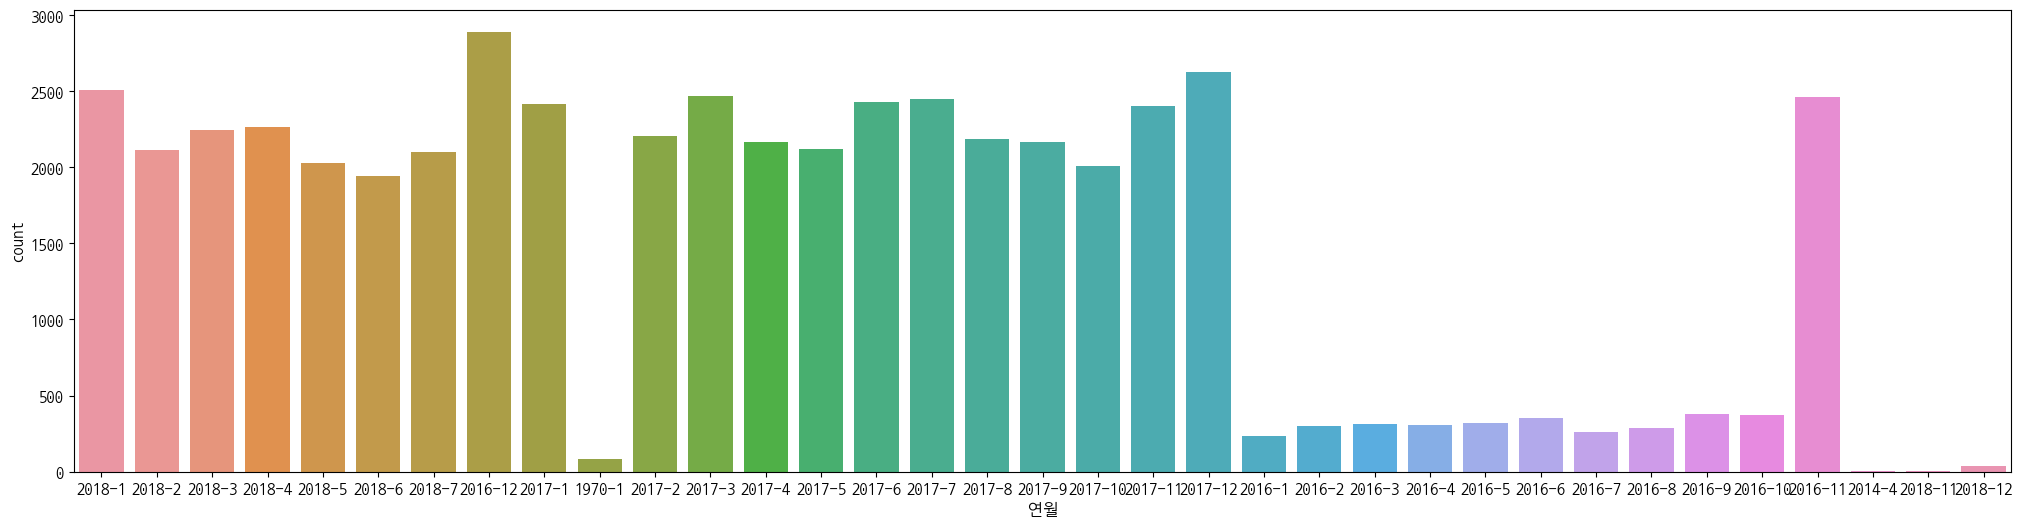

In [32]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='연월')
plt.show()

In [47]:
# 그래프를 '연월'순으로 보기 위해서 연, 월을 오름차순으로 정렬한다.
# sort_values() 메소드의 by 옵션에 정렬의 기준으로 사용할 컬럼을 지정하고(by는 안써도 된다.) ascending 옵션의
# 기본값은 True이고 오름차순으로 정렬되고 False를 지정하면 내림차순으로 정렬된다.
df.sort_values(by=['연', '월'], inplace=True, ascending=False) # '연'이 같으면 '월'을 기준으로 정렬한다.

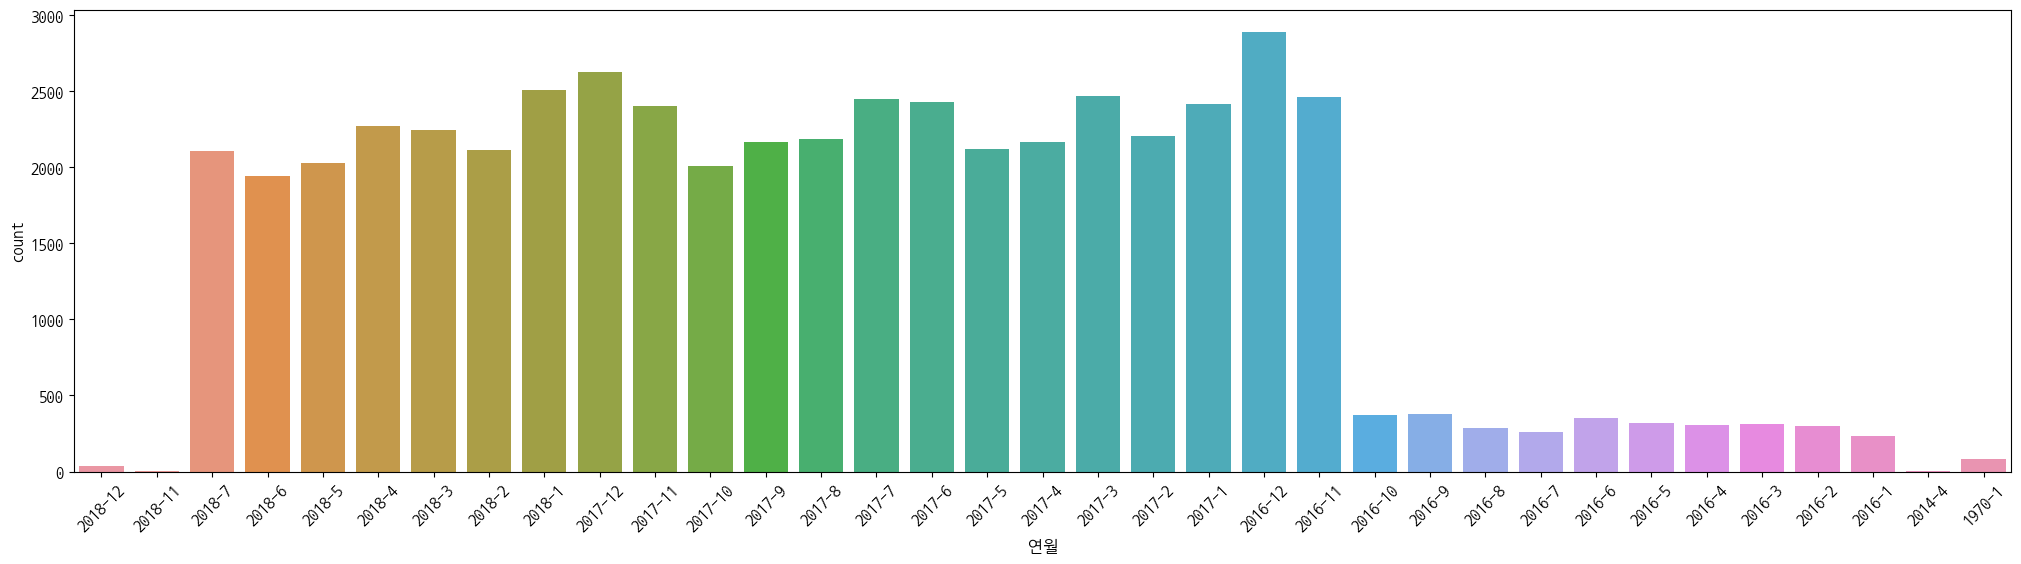

In [52]:
plt.figure(figsize=(25, 6))
# ax = sns.countplot(data=df, x='연월')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.countplot(data=df, x='연월')
plt.xticks(rotation=45)
plt.show()

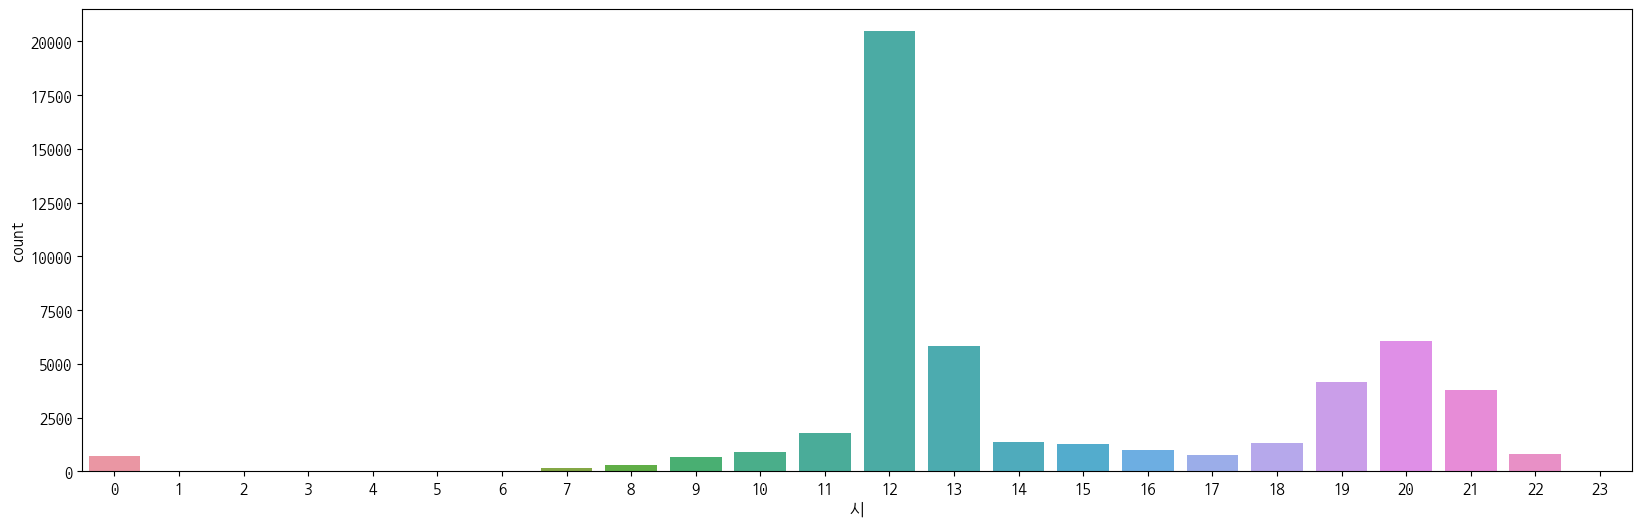

In [53]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='시')
plt.show()

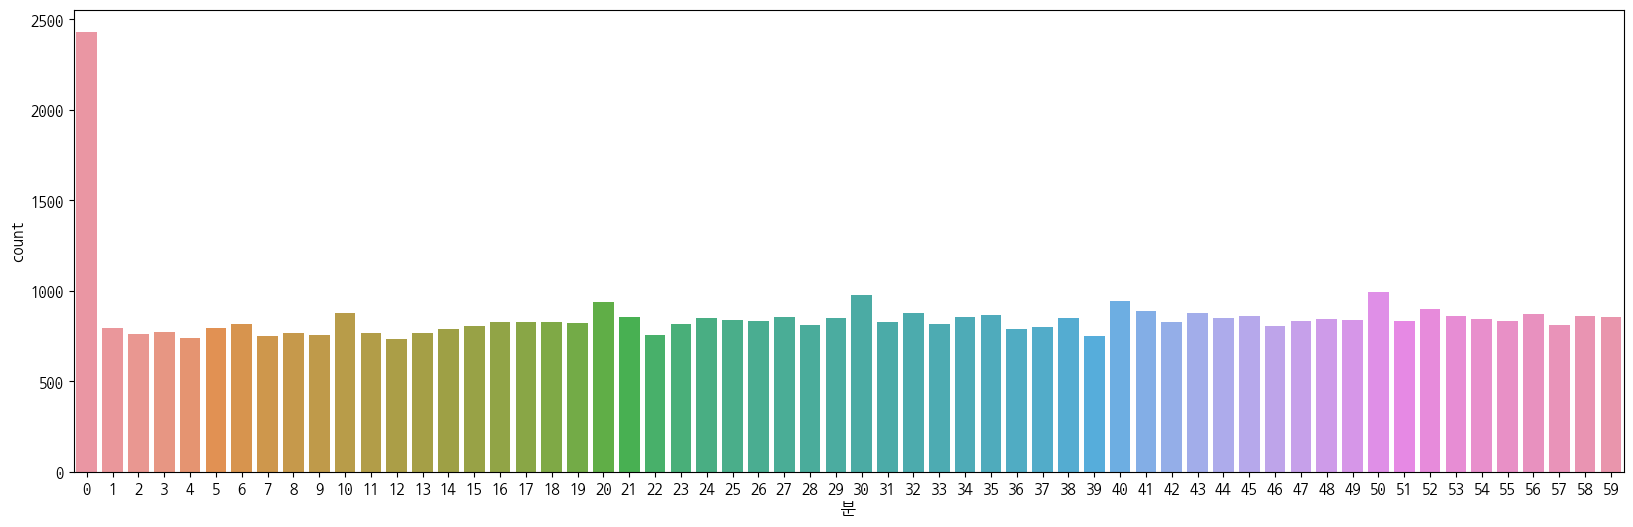

In [54]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='분')
plt.show()

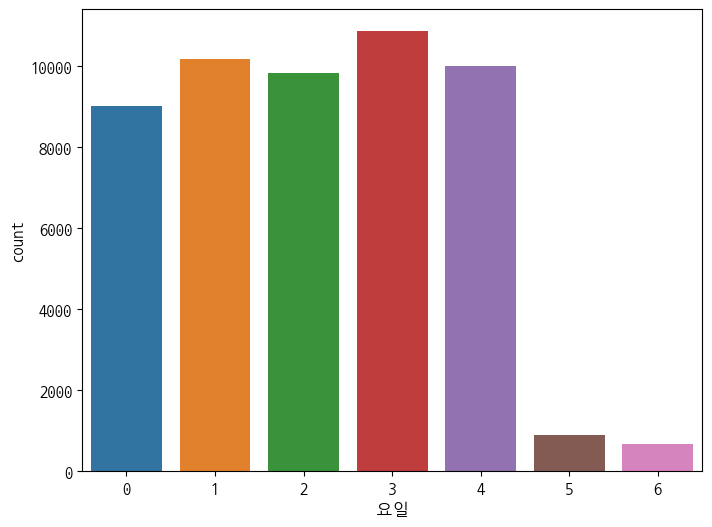

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='요일')
plt.show()

In [57]:
# 요일이 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)과 같이 표시되므로 요일을 문자로 저장하는 파생 변수를 추가한다.
week_dict = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
print(week_dict)

{0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}


In [58]:
df['요일_한글'] = df.요일.apply(lambda week: week_dict[week] + '요일')
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토요일
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화요일
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화요일
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화요일
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3,목요일
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3,목요일
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3,목요일


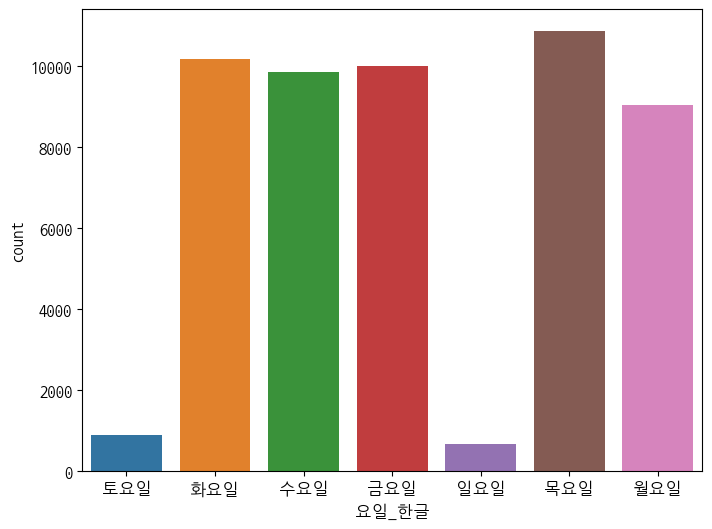

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='요일_한글')
plt.show()

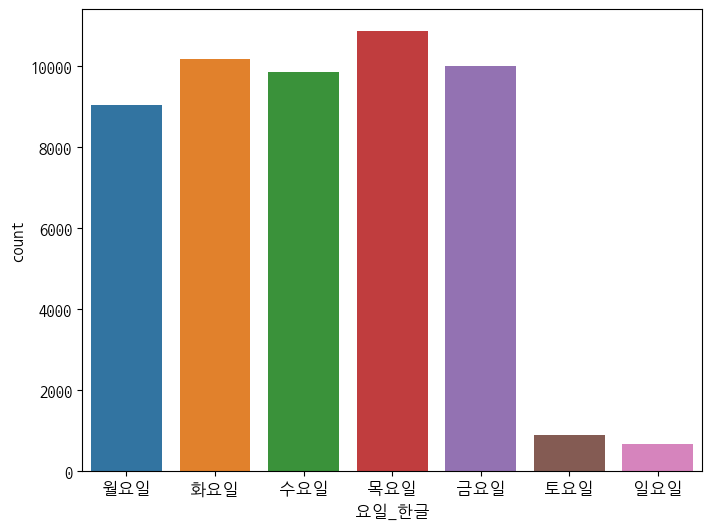

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df.sort_values(by='요일'), x='요일_한글')
plt.show()